In [1]:
import pandas as pd
import numpy as np
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

To compare the busses on_time_percent for each neighborhood, I found the mean OTP for each bus route, and then labeled the bus routes by neighborhood. The code I used was this.

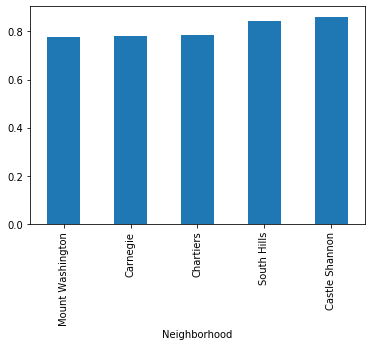

In [10]:
pgh_bus_data = pd.read_csv("https://data.wprdc.org/datastore/dump/00eb9600-69b5-4f11-b20a-8c8ddd8cfe7a",
                           index_col="route", 
                           parse_dates=True)
pgh_bus_data.groupby('route_full_name')['on_time_percent'].mean().sort_values().to_csv('meanOTPbyRoute.csv', header='False') #Writes the Mean OTP per route to a csv file
#Labeled bus routes by neighborhood manually. #Some of these are approximations, since bus routes have a lot of stops.
pgh_bus_data = pd.read_csv("manuallySorted.csv", index_col="Neighborhood")
pgh_bus_data.groupby('Neighborhood')['on_time_percent'].mean().sort_values().to_csv('meanOTPbyNeighborhood.csv', header='False') #We find the mean again because some neighborhoods have multiple routes
pgh_bus_data.groupby('Neighborhood')['on_time_percent'].mean().sort_values().tail().plot.bar()